In [1]:
import urllib.request
import re
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
work_dirs = '/Users/wjs/Library/CloudStorage/OneDrive-Personal/Coding, ML & DL/work_dirs'

In [2]:
# Exploration
response = urllib.request.urlopen("https://www.comp.nus.edu.sg/cs/research/ai/people/") # 网站的地址
html = response.read().decode("utf-8")
bs = BeautifulSoup(html,'html.parser')  # 用于解析获取到的源码
jscript = bs.find_all('script')
js_code = jscript[12]

In [8]:
jscript[11]

<script>
jQuery( document ).ready(function() {
	jQuery( "#diropt" ).change(function() {
	  window.location.href = '//'+window.location.hostname+'/about/'+jQuery( "#diropt" ).val();
	});
});

var app = angular.module('FacApp',[]);

angular.module('FacApp')
	.directive('compile', ['$compile', function ($compile) {
    return function(scope, element, attrs) {
      scope.$watch(
        function(scope) {
          // watch the 'compile' expression for changes
          return scope.$eval(attrs.compile);
        },
        function(value) {
          // when the 'compile' expression changes
          // assign it into the current DOM
          element.html(value);

          // compile the new DOM and link it to the current
          // scope.
          // NOTE: we only compile .childNodes so that
          // we don't get into infinite loop compiling ourselves
          $compile(element.contents())(scope);
        }
    );
  };
}]);

app.controller('FacController', function($scope,$sce)
{

In [3]:
# Input string containing the data
data_string = str(js_code)

# Define a regex pattern to extract key-value pairs
pattern = r'name:\s*"([^"]*)".*?title:\s*"([^"]*)".*?email:\s*"<img src=\\"([^\\"]+)\\".*?officetel:\s*"([^"]*)".*?tel:\s*"([^"]*)".*?image:\s*"([^"]*)".*?image2:\s*"([^"]*)".*?socid:\s*"([^"]*)".*?Dept:\s*"([^"]*)".*?Area:\s*"([^"]*)".*?Bio:\s*"([^"]*)".*?ApptAdm:\s*"([^"]*)".*?researcharea:\s*"<a [^>]*>(.*?)</a>".*?biolinkstat:\s*"([^"]*)".*?photoSrc:\s*"([^"]*)".*?'
data_string = data_string.split('scope.allStaffs =')[1]
matches = re.findall(pattern, data_string, re.DOTALL)

# Process and print the results
for match in matches:
    (name, title, email, officetel, tel, image, image2, socid, Dept, Area, Bio, ApptAdm, researcharea, biolinkstat, photoSrc) = match
    print(f"Name: {name}")
    print(f"Title: {title}")
    print(f"Email: {email}")
    print(f"Office Tel: {officetel}")
    print(f"Tel: {tel}")
    print(f"Image: {image}")
    print(f"Image2: {image2}")
    print(f"SOCID: {socid}")
    print(f"Dept: {Dept}")
    print(f"Area: {Area}")
    print(f"Bio: {Bio}")
    print(f"ApptAdm: {ApptAdm}")
    print(f"Research Area: {researcharea}")
    print(f"Bio Link Status: {biolinkstat}")
    print("\n" + "="*40 + "\n")

IndexError: list index out of range

In [127]:
# Store in a dataframe
prof_df = []
for match in matches:
    (name, title, email, officetel, tel, image, image2, socid, Dept, Area, Bio, ApptAdm, researcharea, biolinkstat, photoSrc) = match
    new_df = pd.DataFrame([[name, title, email, officetel, tel, image, image2, socid, Dept, Area, Bio, researcharea]])

    new_df.columns = ['Name','Title','Email','OfficeTel','Tel','Image','Image2','Socid','Dept','Area','Bio','ResearchArea']
    prof_df.append(new_df)
prof_df = pd.concat(prof_df)
prof_df.reset_index(inplace=True,drop=True)
display(prof_df.head())

,Name,Title,Email,OfficeTel,Tel,Image,Image2,Socid,Dept,Area,Bio,ResearchArea
0,AI Xin,Lecturer (Educator Track),https://www.comp.nus.edu.sg/~sochr/www/stfphot...,COM3-B1-24,660 16657,https://www.comp.nus.edu.sg/~sochr/www/stfphot...,https://www.comp.nus.edu.sg/~sochr/www/stfphot...,aixin,252,1,/cs/people/aixin,<span id='divlink' class='1'>Artificial Intell...
1,Arnab BHATTACHARYYA,Associate Professor,https://www.comp.nus.edu.sg/~sochr/www/stfphot...,COM3-02-42,660 17898,https://www.comp.nus.edu.sg/~sochr/www/stfphot...,https://www.comp.nus.edu.sg/~sochr/www/stfphot...,arnab,252,"1,11",/cs/people/arnab,<span id='divlink' class='11'>Algorithms & The...
2,Anand BHOJAN,Senior Lecturer (Educator Track),https://www.comp.nus.edu.sg/~sochr/www/stfphot...,COM3-02-49,651 67351,https://www.comp.nus.edu.sg/~sochr/www/stfphot...,https://www.comp.nus.edu.sg/~sochr/www/stfphot...,bhojan,252,"1,4,5",/cs/people/bhojan,<span id='divlink' class='1'>Artificial Intell...
3,Xavier Roger Gilbert BRESSON,Associate Professor,https://www.comp.nus.edu.sg/~sochr/www/stfphot...,COM2-04-26,660 17633,https://www.comp.nus.edu.sg/~sochr/www/stfphot...,https://www.comp.nus.edu.sg/~sochr/www/stfphot...,xaviercs,252,1,/cs/people/xaviercs,<span id='divlink' class='1'>Artificial Intell...
4,CHEN Tsuhan,Distinguished Professor,https://www.comp.nus.edu.sg/~sochr/www/stfphot...,COM1-03-04,651 64544,https://www.comp.nus.edu.sg/~sochr/www/stfphot...,https://www.comp.nus.edu.sg/~sochr/www/stfphot...,tsuhan,252,"1,4",/cs/people/tsuhan,<span id='divlink' class='1'>Artificial Intell...


In [128]:
# Further Data Cleaning
# Email: in the form of photo
# Bio: add https://www.comp.nus.edu.sg/ as prefix
prof_df['Bio'] = 'https://www.comp.nus.edu.sg' + prof_df['Bio']
# Research Area: decompose into a nice string
pattern = r'<span[^>]*>(.*?)</span>'
prof_df['ResearchArea'] = [re.findall(pattern, researcharea) for researcharea in prof_df['ResearchArea'].to_list()]

In [134]:
work_dirs = '/Users/wjs/Library/CloudStorage/OneDrive-Personal/Coding, ML & DL/work_dirs'
prof_df.to_csv(f'{work_dirs}/nusprof.csv')

# Module for NUS Website

## Get Basic Information

In [155]:
url = f"""https://www.comp.nus.edu.sg/cs/research/#ra"""
response = urllib.request.urlopen(url) # 网站的地址
html = response.read().decode("utf-8")
bs = BeautifulSoup(html,'html.parser')  # 用于解析获取到的源码

In [162]:
all_researchareas = [h.find_all('a') for h in bs.find_all("h6",{"class":"elementor-heading-title elementor-size-default"})][:8]
all_researchareas = [ra[0] for ra in all_researchareas]
all_researchareas = {ra.text:ra['href'] for ra in all_researchareas}
all_researchareas

{'Algorithms & Theory': 'https://www.comp.nus.edu.sg/cs/research/algo/',
 'Artificial Intelligence': 'https://www.comp.nus.edu.sg/cs/research/ai/',
 'Computational Biology': 'https://www.comp.nus.edu.sg/cs/research/cb/',
 'Databases': 'https://www.comp.nus.edu.sg/cs/research/db/',
 'Media': 'https://www.comp.nus.edu.sg/cs/research/media/',
 'Programming Languages & Software Engineering': 'https://www.comp.nus.edu.sg/cs/research/plse/',
 'Security': 'https://www.comp.nus.edu.sg/cs/research/security/',
 'Systems & Networking': 'https://www.comp.nus.edu.sg/cs/research/sys-net/'}

In [173]:
def get_jscode_byarea(area,urls):
    url = f"""{urls[area]}/people/"""
    print('Get data from: ', url)
    response = urllib.request.urlopen(url) # 网站的地址
    html = response.read().decode("utf-8")
    bs = BeautifulSoup(html,'html.parser')  # 用于解析获取到的源码
    jscript = bs.find_all('script')
    js_code = jscript[12]
    return js_code

def get_profdata_byjscode(raw_jscode):
    # Input string containing the data
    data_string = str(raw_jscode)

    # Define a regex pattern to extract key-value pairs
    pattern = r'name:\s*"([^"]*)".*?title:\s*"([^"]*)".*?email:\s*"<img src=\\"([^\\"]+)\\".*?officetel:\s*"([^"]*)".*?tel:\s*"([^"]*)".*?image:\s*"([^"]*)".*?image2:\s*"([^"]*)".*?socid:\s*"([^"]*)".*?Dept:\s*"([^"]*)".*?Area:\s*"([^"]*)".*?Bio:\s*"([^"]*)".*?ApptAdm:\s*"([^"]*)".*?researcharea:\s*"<a [^>]*>(.*?)</a>".*?biolinkstat:\s*"([^"]*)".*?photoSrc:\s*"([^"]*)".*?'
    data_string = data_string.split('scope.allStaffs =')[1]
    matches = re.findall(pattern, data_string, re.DOTALL)

    # Store in a dataframe
    prof_df = []
    for match in matches:
        (name, title, email, officetel, tel, image, image2, socid, Dept, Area, Bio, ApptAdm, researcharea, biolinkstat, photoSrc) = match
        new_df = pd.DataFrame([[name, title, email, officetel, tel, image, image2, socid, Dept, Area, Bio, researcharea]])

        new_df.columns = ['Name','Title','Email','OfficeTel','Tel','Image','Image2','Socid','Dept','Area','Bio','ResearchArea']
        # Email: in the form of photo
        prof_df.append(new_df)
    prof_df = pd.concat(prof_df)
    # Bio: add https://www.comp.nus.edu.sg/ as prefix
    prof_df['Bio'] = 'https://www.comp.nus.edu.sg' + prof_df['Bio']
    # Research Area: decompose into a nice string
    pattern = r'<span[^>]*>(.*?)</span>'
    prof_df['ResearchArea'] = [re.findall(pattern, researcharea) for researcharea in prof_df['ResearchArea'].to_list()]
    prof_df.reset_index(inplace=True,drop=True)
    return prof_df

In [176]:
prof_df = []
for area in all_researchareas:
    url = all_researchareas[area]
    print(f'{area}:{url}')
    raw_jscode = get_jscode_byarea(area,all_researchareas)
    prof_df_byarea = get_profdata_byjscode(raw_jscode)
    prof_df.append(prof_df_byarea)
    # display(prof_df_byarea[["Name","ResearchArea","Bio"]].head())
prof_df = pd.concat(prof_df)
prof_df.reset_index(inplace=True,drop=True)

Algorithms & Theory:https://www.comp.nus.edu.sg/cs/research/algo/
Get data from:  https://www.comp.nus.edu.sg/cs/research/algo//people/
Artificial Intelligence:https://www.comp.nus.edu.sg/cs/research/ai/
Get data from:  https://www.comp.nus.edu.sg/cs/research/ai//people/
Computational Biology:https://www.comp.nus.edu.sg/cs/research/cb/
Get data from:  https://www.comp.nus.edu.sg/cs/research/cb//people/
Databases:https://www.comp.nus.edu.sg/cs/research/db/
Get data from:  https://www.comp.nus.edu.sg/cs/research/db//people/
Media:https://www.comp.nus.edu.sg/cs/research/media/
Get data from:  https://www.comp.nus.edu.sg/cs/research/media//people/
Programming Languages & Software Engineering:https://www.comp.nus.edu.sg/cs/research/plse/
Get data from:  https://www.comp.nus.edu.sg/cs/research/plse//people/
Security:https://www.comp.nus.edu.sg/cs/research/security/
Get data from:  https://www.comp.nus.edu.sg/cs/research/security//people/
Systems & Networking:https://www.comp.nus.edu.sg/cs/re

In [250]:
prof_df.reset_index(drop=True,inplace=True)

In [251]:
# Store the csv
prof_df.to_csv(f'{work_dirs}/nusprof.csv')

In [5]:
# Read the csv
prof_df = pd.read_csv(f'{work_dirs}/nusprof.csv')

In [242]:
# Find unique elements
unique_name_idx_dict = {}
for idx in range(prof_df.shape[0]):
    name = prof_df['Name'][idx]
    unique_name_idx_dict[name] = idx
prof_df = prof_df.iloc[list(unique_name_idx_dict.values())]

## Basic Analysis

In [243]:
# Get All Research Area
research_areas = list(set(sum(prof_df['ResearchArea'],[])))
research_areas

['Data Science & Business Analytics',
 'Programming Languages & Software Engineering',
 'Systems & Networking',
 'Algorithms & Theory',
 'Database',
 'Media',
 'Artificial Intelligence',
 'Security',
 'Computational Biology',
 'Healthcare Informatics',
 'Computational Social Science',
 'Digital Transformation, Platforms & Innovation']

In [244]:
# Analysis
# Check number of professors for each research area
for ra in research_areas:
    prof_df[ra] = prof_df['ResearchArea'].apply(lambda x: ra in x)
percofprof_byresearcharea = prof_df[research_areas].mean()

/var/folders/kv/xb4g87pn2hj8jntc414ty1zm0000gn/T/ipykernel_35368/3542514646.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prof_df[ra] = prof_df['ResearchArea'].apply(lambda x: ra in x)


In [245]:
percofprof_byresearcharea.sort_values()

Computational Social Science                      0.009174
Digital Transformation, Platforms & Innovation    0.009174
Data Science & Business Analytics                 0.018349
Healthcare Informatics                            0.018349
Computational Biology                             0.064220
Security                                          0.137615
Programming Languages & Software Engineering      0.155963
Database                                          0.155963
Algorithms & Theory                               0.238532
Systems & Networking                              0.247706
Media                                             0.247706
Artificial Intelligence                           0.403670
dtype: float64

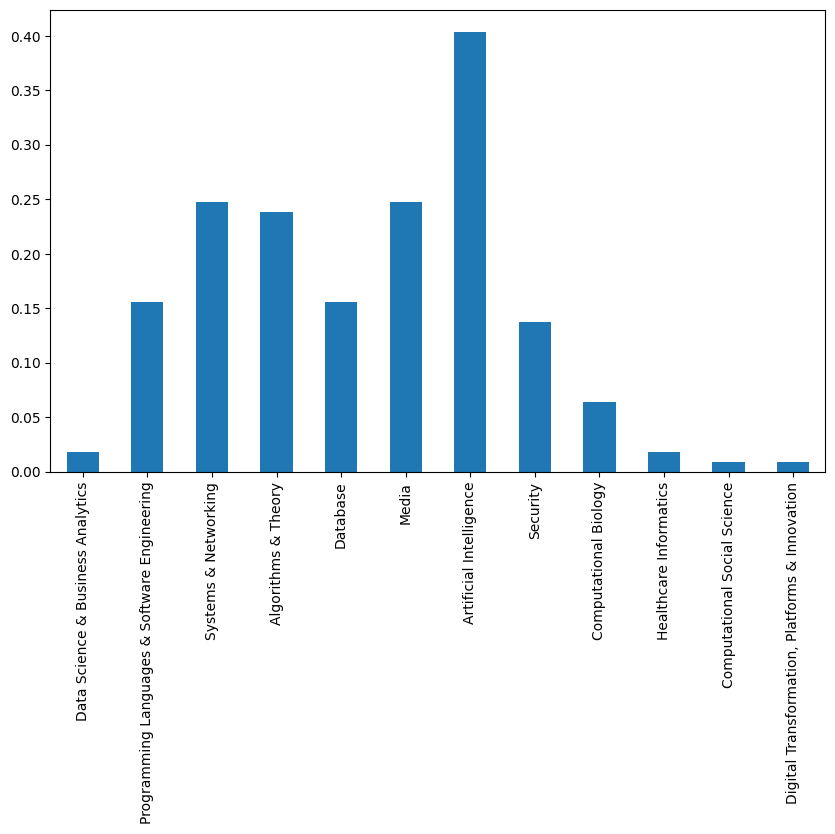

In [246]:
# Plot the Series
plt.figure(figsize=(10, 6))
percofprof_byresearcharea.plot(kind='bar')
plt.show()

In [247]:
# Number of Prof by Title
prof_df.groupby('Title').count()['Name']

Title
Assistant Professor                     14
Associate Professor                     26
Associate Professor (Educator Track)     7
Associate Professor (Practice Track)     2
Dean's Chair Associate Professor         4
Distinguished Professor                  1
Emeritus Professor                       1
Honorary Fellow                          1
KITHCT Chair Professor                   2
Lecturer                                 1
Lecturer (Educator Track)               12
Lee Kong Chian Centennial Professor      1
NUS Presidential Young Professor         6
Professor                               13
Professor (Practice Track)               2
Provost's Chair Professor                8
Senior Lecturer (Educator Track)         6
Sung Kah Kay Assistant Professor         1
Tan Sri Runme Shaw Senior Professor      1
Name: Name, dtype: int64

In [248]:
def filter_by_title(x, title = 'Young Prof'):
    return title in x
prof_df[prof_df['Title'].apply(filter_by_title) & prof_df['Artificial Intelligence']]

,Name,Title,Email,OfficeTel,Tel,Image,Image2,Socid,Dept,Area,...,Systems & Networking,Algorithms & Theory,Database,Media,Artificial Intelligence,Security,Computational Biology,Healthcare Informatics,Computational Social Science,"Digital Transformation, Platforms & Innovation"
36,Kenji KAWAGUCHI,NUS Presidential Young Professor,https://www.comp.nus.edu.sg/~sochr/www/stfphot...,COM3-02-52,,https://www.comp.nus.edu.sg/~sochr/www/stfphot...,https://www.comp.nus.edu.sg/~sochr/www/stfphot...,kenji,252,"1,11",...,False,True,False,False,True,False,False,False,False,False
176,WANG Jingxian,NUS Presidential Young Professor,https://www.comp.nus.edu.sg/~sochr/www/stfphot...,COM2-03-32,651 65763,https://www.comp.nus.edu.sg/~sochr/www/stfphot...,https://www.comp.nus.edu.sg/~sochr/www/stfphot...,wangjx,252,"1,4,5",...,True,False,False,True,True,False,False,False,False,False
178,YOU Yang,NUS Presidential Young Professor,https://www.comp.nus.edu.sg/~sochr/www/stfphot...,COM3-02-51,660 17698,https://www.comp.nus.edu.sg/~sochr/www/stfphot...,https://www.comp.nus.edu.sg/~sochr/www/stfphot...,youy,252,"1,5",...,True,False,False,False,True,False,False,False,False,False


In [271]:
# Collect information for every individual professors
url = f"""https://www.comp.nus.edu.sg/cs/people/bleong/"""
response = urllib.request.urlopen(url) # 网站的地址
html = response.read().decode("utf-8")
bs = BeautifulSoup(html,'html.parser')  # 用于解析获取到的源码

## Get Detailed Information

In [308]:
def get_researchinterest(website):
    # Research interest
    research_interest = website.find_all(attrs={'id':'res_interest'})[0].find_all('p')
    research_interest = [ri.text for ri in research_interest]
    return research_interest
def get_award(website):
    # Awards
    awards = website.find_all(attrs={'id':'award'})[0].find_all('p')
    awards = [a.text for a in awards]
    return awards
def get_teaching(website):
    # Modules Taught
    def clean_special(text):
        text = text.split('\n')[1:3]
        text = ' '.join(text)
        return text
    courses = website.find_all(attrs={'id':'teaching'})[0].find_all('div',attrs={"style":"justify-content:flex-start;gap:15px;display:flex;margin-bottom:8px;"})
    courses = [clean_special(course.text) for course in courses]
    return courses
def get_profile(website):
    # Profile
    profile = website.find_all(attrs={'id':'profile'})[0].find_all('p')[0]
    profile = profile.text
    return profile
def get_publication(website):
    # Selected Pub
    def clean_selectedpub(pub):
        # Regex pattern to extract the article name
        pattern = r'"(.*?)"'

        # Search for the pattern in the text
        match = re.search(pattern, pub)
        try:
            return match.group(1)
        except:
            return pub
    selectedpubs = website.find_all(attrs={'id':'selectedpublication'})[0].find_all(attrs = {'class':'pub1'})
    selectedpubs = [clean_selectedpub(pub.text) for pub in selectedpubs]
    return selectedpubs

In [324]:
names = prof_df['Name'].tolist()
urls = prof_df['Bio'].tolist()
prof_infos = dict()
numberofnames = len(names)
for idx, url in enumerate(urls):
    name = names[idx]
    response = urllib.request.urlopen(url) # 网站的地址
    html = response.read().decode("utf-8")
    website = BeautifulSoup(html,'html.parser')  # 用于解析获取到的源码
    print(f'Get Data for {name}, {idx}/{numberofnames}')
    prof_info = dict()
    prof_info['researchinterest'] = get_researchinterest(website)
    prof_info['award'] = get_award(website)
    prof_info['course'] = get_teaching(website)
    prof_info['profile'] = get_profile(website)
    prof_info['publication'] = get_publication(website)
    prof_infos[name] = prof_info

Get Data for Divesh AGGARWAL
Get Data for Arnab BHATTACHARYYA
Get Data for Diptarka CHAKRABORTY
Get Data for CHANG Yi-Jun
Get Data for Seth Lewis GILBERT
Get Data for Steven HALIM
Get Data for Joxan JAFFAR
Get Data for Rahul JAIN
Get Data for Sanjay JAIN
Get Data for Kenji KAWAGUCHI
Get Data for LEONG Hon Wai
Get Data for LEOW Wee Kheng
Get Data for Umang MATHUR
Get Data for Kuldeep S. MEEL
Get Data for Prateek SAXENA
Get Data for Jonathan SCARLETT
Get Data for Ilya SERGEY
Get Data for Reza SHOKRI
Get Data for Frank Christian STEPHAN
Get Data for Warut SUKSOMPONG
Get Data for TAY Yong Chiang
Get Data for Prashant Nalini VASUDEVAN
Get Data for WONG Lim Soon
Get Data for XIAO Xiaokui
Get Data for Roland YAP
Get Data for YU Haifeng
Get Data for AI Xin
Get Data for Anand BHOJAN
Get Data for Xavier Roger Gilbert BRESSON
Get Data for CHEN Tsuhan
Get Data for Martin HENZ
Get Data for Bryan HOOI
Get Data for David HSU
Get Data for Wynne HSU
Get Data for KAN Min Yen
Get Data for LEE Gim Hee
Get

In [325]:
prof_details_df = []
for name in prof_infos:
    tmp_dict = {key:[value] for key,value in prof_infos[name].items()}
    prof_details_df_byname = (pd.DataFrame(tmp_dict))
    prof_details_df_byname['Name'] = name
    prof_details_df.append(prof_details_df_byname)
prof_details_df = pd.concat(prof_details_df)
prof_details_df.reset_index(drop=True,inplace=True)
display(prof_details_df)

,researchinterest,award,course,profile,publication,Name
0,"[Lattices: Algorithms and Complexity, Pseudora...",[],"[CS4268 Quantum Computing, CS6234 Advanced Alg...",Divesh Aggarwal received his Ph.D. in Computer...,[],Divesh AGGARWAL
1,"[Algorithms for High-Dimensional Data, Statist...",[NRF Fellowship for Artificial Intelligence (C...,[CS3230 Design and Analysis of Algorithms],Arnab Bhattacharyya is an assistant professor ...,[Near-Optimal Learning of Tree-Structured Dist...,Arnab BHATTACHARYYA
2,[Theoretical Computer Science; more specifical...,"[Faculty Teaching Excellence Award 2024, Googl...","[CS2040S Data Structures and Algorithms, CS523...",Dr Diptarka CHAKRABORTY is an assistant profes...,[Tight Lower Bound on Equivalence Testing in C...,Diptarka CHAKRABORTY
3,"[Distributed, parallel, and sublinear algorith...","[2020 PODC Doctoral Dissertation Award, PODC 2...","[CS3230 Design and Analysis of Algorithms, CS5...",CHANG Yi-Jun is an NUS Presidential Young Prof...,[Near-optimal distributed triangle enumeration...,CHANG Yi-Jun
4,"[Distributed and Parallel Algorithms, Algorith...",[Young Researcher Award: NUS university-wide a...,[],My research focuses on algorithms for large-sc...,"[Slow links, fast links, and the cost of gossi...",Seth Lewis GILBERT
...,...,...,...,...,...,...
104,"[Education Technology, Computer Architecture, ...","[NUS Teaching Academy (Fellow since 2011, Exec...",[CS3216 Software Product Engineering for Digit...,Yuen Jien has been in NUS for more than 20 yea...,[],SOO Yuen Jien
105,"[Parallel and Distributed Systems, Symbiotic S...",[2016 ASIASIM FELLOW ],[CS5233 Simulation and Modelling Techniques],Gary Tan was a pioneer in the Direct Honours P...,"[S. Hetu, S. Gupta, G. Tan, V. Vu, “A Simulati...",Gary TAN
106,"[Parallel & Distributed Computing, Performance...","[INFORMS Winter Simulation Conference, Best Pa...",[CS5224 Cloud Computing],Teo Yong Meng is an Associate Professor with t...,"[S. Rathnayake, D. Loghin and Y.M. Teo, CELIA:...",TEO Yong Meng
107,"[Wireless Communication, Internet of Things, E...",[Mentor to Winner of Student Research Competit...,"[CS4222 Wireless Networking, CS5272 Embedded S...","Ambuj Varshney's interests span circuits, devi...",[Securing Battery-free Backscatter Tags throug...,Ambuj VARSHNEY


In [327]:
detailed_df = pd.concat([prof_df.set_index('Name'), prof_details_df.set_index('Name')], axis=1, join='inner')
# Store the csv
detailed_df.to_csv(f'{work_dirs}/nusprof_detailed.csv')

In [335]:
def filter_by(x, y = 'Young Prof'):
    return y in x
def filter_df(df:pd.DataFrame,criteria:dict):
    for col,pattern in criteria.items():
        df = df[df[col].apply(filter_by, y=pattern)]
    return df

In [353]:
criteria = {'Title':'Young Professor',
            'ResearchArea':'Artificial Intelligence'}
df = (filter_df(detailed_df.copy(),criteria)[['Title','ResearchArea','researchinterest','Bio']])
display(df)

,Title,ResearchArea,researchinterest,Bio
Name,,,,
Kenji KAWAGUCHI,NUS Presidential Young Professor,"[Algorithms & Theory, Artificial Intelligence]","[Deep Learning, Large Language Models (LLMs)]",https://www.comp.nus.edu.sg/cs/people/kenji
WANG Jingxian,NUS Presidential Young Professor,"[Artificial Intelligence, Media, Systems & Net...",[Multimodal AI (supported by Microsoft's Accel...,https://www.comp.nus.edu.sg/cs/people/wangjx
YOU Yang,NUS Presidential Young Professor,"[Artificial Intelligence, Systems & Networking]",[Machine Learning; High-Performance Computing;...,https://www.comp.nus.edu.sg/cs/people/youy


## Detailed Analysis

In [176]:
# Read the csv
converter_dict = {
    "researchinterest": lambda x: x.strip("[]").replace("'","").split(", "),
    'publication': lambda x: x.strip("[]").replace("'","").split(", "),
}
detailed_df = pd.read_csv(f'{work_dirs}/nusprof_detailed.csv',converters = converter_dict)
detailed_df = detailed_df.set_index('Name')

In [47]:
all_researchinterests = list(set(sum(detailed_df['researchinterest'],[])))
all_researchinterests.remove('')

In [48]:
# 下一步 通过语义分析，对比我的 interest 和老师 interest 的相近程度
ri_dict = {}

for ri in all_researchinterests:
    ri_dict[ri] = detailed_df['researchinterest'].apply(lambda x: ri in x).mean()

In [49]:
pd.Series(ri_dict).T.sort_values(ascending=False)

Machine Learning                                0.064220
Computer Vision                                 0.055046
Programming Languages                           0.045872
Complexity Theory                               0.036697
Natural Language Processing                     0.036697
                                                  ...   
Multimedia and Social Media Computing           0.009174
federated/distributed/collaborative learning    0.009174
Spatio-temporal Data Mining                     0.009174
Large Language Models (LLMs)                    0.009174
Blockchain                                      0.009174
Length: 430, dtype: float64

In [44]:
import torchtext.vocab as vocab
# cache_dir是保存golve词典的缓存路径
cache_dir = '.vector_cache/glove'
# dim是embedding的维度
glove = vocab.GloVe(name='6B', dim=50, cache=cache_dir) 

.vector_cache/glove/glove.6B.zip: 862MB [02:45, 5.22MB/s]                               
100%|█████████▉| 399999/400000 [00:04<00:00, 82588.15it/s]


## Check Correlation with Research Interest

In [236]:
import numpy as np
def split_proper_text(text):
    # 将逗号替换为空格
    text = text.replace(',', '')
    text = text.replace('-', '')
    text = text.replace('(', '')
    text = text.replace(')', '')
    # 按空格分割字符串
    words = text.split()
    if len(words)  == 0:
        words = [' ']
    return words

def sentence_to_token(sentences):
    wordsequence = [split_proper_text(sentence) for sentence in sentences]
    return wordsequence

def embedding_matrix(sentences,index_names=None):
    ri_sequence = sentence_to_token(sentences)
    if index_names is not None:
        ri_matrix = pd.DataFrame([np.mean((glove.get_vecs_by_tokens(ri_words, True)).numpy(),axis=0) for ri_words in ri_sequence],index=index_names).T.reset_index(drop=True)
    else:
        ri_matrix = pd.DataFrame([np.mean((glove.get_vecs_by_tokens(ri_words, True)).numpy(),axis=0) for ri_words in ri_sequence]).T.reset_index(drop=True)
    ri_matrix = ri_matrix[ri_matrix.sum()[ri_matrix.sum()!=0].index]
    return ri_matrix

def get_cor_withembedmatrix(input, embed_matrix):
    input = input.split(' ')
    input_emd = pd.Series(np.mean((glove.get_vecs_by_tokens(input, True)).numpy(),axis=0))
    return embed_matrix.corrwith(input_emd)

def filter_for_listofstrings(listofstrings:list,texts=['AI']):
    tempstring = ' '.join(listofstrings)
    for text in texts:
        if text in tempstring:
            return True
    return False

In [230]:
text = 'Applied Machine Learning'
ri_matrix = embedding_matrix(sentences=all_researchinterests,index_names=all_researchinterests)
most_relatedri = get_cor_withembedmatrix(text,ri_matrix).sort_values(ascending=False).head()
print(f'Most Related Research Interests with {text} Found:')
print(most_relatedri)

Most Related Research Interests with Applied Machine Learning Found:
Applied Machine Learning                 1.000000
Data-Efficient Machine Learning (e.g.    0.963429
privacy-preserving machine learning)     0.956823
 Machine Learning                        0.956823
Machine Learning                         0.956823
dtype: float64


In [231]:
prof_researchinterests = detailed_df['researchinterest'].apply(filter_for_listofstrings,texts=most_relatedri.index)
print('Professors with the Relevant RI:')
print(detailed_df[prof_researchinterests==True][['Title','Bio']])

Professors with the Relevant RI:
                                                                    Title  \
Name                                                                        
Jonathan SCARLETT                                     Associate Professor   
Reza SHOKRI                              Dean's Chair Associate Professor   
AI Xin                                          Lecturer (Educator Track)   
Xavier Roger Gilbert BRESSON                          Associate Professor   
Bryan HOOI                                            Assistant Professor   
KAN Min Yen                                           Associate Professor   
LEE Gim Hee                                           Associate Professor   
LEE Wee Sun                                                     Professor   
LEONG Tze Yun                                  Professor (Practice Track)   
Daren LER                                       Lecturer (Educator Track)   
LOW Kian Hsiang                            

In [232]:
def embedding_matrix_fromnestedsentence(sentences,index_names):
    sentences = [' '.join(sentence) for sentence in sentences]
    return embedding_matrix(sentences,index_names)

In [233]:
text = 'Deep Learning, Applied'
emd_matrix = embedding_matrix_fromnestedsentence(sentences=detailed_df['publication'],index_names=detailed_df.index)
most_related = get_cor_withembedmatrix(text,emd_matrix).sort_values(ascending=False).head()
print(f'Most Related Research Interests with {text} Found:')
print(most_related)

Most Related Research Interests with Deep Learning, Applied Found:
Name
Akshay NARAYAN     0.852109
YU Haifeng         0.836305
Sanka RASNAYAKA    0.834428
NG See Kiong       0.826807
LEE Gim Hee        0.819260
dtype: float64


In [226]:
prof_mostrelated = detailed_df.loc[most_related.index]
print('Professors with the Relevant RI:')
print(prof_mostrelated[['Title','Bio','ResearchArea','profile']])

Professors with the Relevant RI:
                                            Title  \
Name                                                
Akshay NARAYAN          Lecturer (Educator Track)   
YU Haifeng       Dean's Chair Associate Professor   
Sanka RASNAYAKA         Lecturer (Educator Track)   
NG See Kiong           Professor (Practice Track)   
LEE Gim Hee                   Associate Professor   

                                                            Bio  \
Name                                                              
Akshay NARAYAN   https://www.comp.nus.edu.sg/cs/people/anarayan   
YU Haifeng           https://www.comp.nus.edu.sg/cs/people/yuhf   
Sanka RASNAYAKA     https://www.comp.nus.edu.sg/cs/people/sanka   
NG See Kiong         https://www.comp.nus.edu.sg/cs/people/ngsk   
LEE Gim Hee         https://www.comp.nus.edu.sg/cs/people/leegh   

                                                      ResearchArea  \
Name                                                   

In [248]:
text = 'Deep Learning, Applied'
names = detailed_df.index.tolist()
prof_score = dict()
for i in range(len(names)):
    name = names[i]
    emd_matrix = embedding_matrix(sentences=detailed_df['publication'].iloc[i])
    most_related = get_cor_withembedmatrix(text,emd_matrix).max()
    prof_score[name] = most_related
prof_score = pd.Series(prof_score).fillna(0).sort_values(ascending=False)
print(f'Most Related Research Interests with {text} Found:', )
print(prof_score)

Most Related Research Interests with Deep Learning, Applied Found: Rahul JAIN                      0.865751
TEO Yong Meng                   0.862335
PEH Li Shiuan                   0.859161
Kenji KAWAGUCHI                 0.858226
LEE Gim Hee                     0.858138
                                  ...   
Xavier Roger Gilbert BRESSON    0.000000
Prashant Nalini VASUDEVAN       0.000000
Warut SUKSOMPONG                0.000000
Umang MATHUR                    0.000000
Rajendra Prasad SIRIGINA        0.000000
Length: 109, dtype: float64


In [249]:
prof_mostrelated = detailed_df.loc[prof_score.head().index]
print('Professors with the Relevant RI:')
print(prof_mostrelated[['Title','Bio','ResearchArea','profile']])

Professors with the Relevant RI:
                                            Title  \
Rahul JAIN                              Professor   
TEO Yong Meng                 Associate Professor   
PEH Li Shiuan           Provost's Chair Professor   
Kenji KAWAGUCHI  NUS Presidential Young Professor   
LEE Gim Hee                   Associate Professor   

                                                         Bio  \
Rahul JAIN       https://www.comp.nus.edu.sg/cs/people/rahul   
TEO Yong Meng    https://www.comp.nus.edu.sg/cs/people/teoym   
PEH Li Shiuan      https://www.comp.nus.edu.sg/cs/people/peh   
Kenji KAWAGUCHI  https://www.comp.nus.edu.sg/cs/people/kenji   
LEE Gim Hee      https://www.comp.nus.edu.sg/cs/people/leegh   

                                                      ResearchArea  \
Rahul JAIN                     ['Security', 'Algorithms & Theory']   
TEO Yong Meng                             ['Systems & Networking']   
PEH Li Shiuan                             ['Systems &